In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(os.listdir())

['DOG POPULATION PDSA.csv', '.DS_Store', 'images', 'dog_rehoming_vs_surrenders.png', 'Parliament report.csv', 'Dogs trust UK rehoming data.csv', 'dogs_vs_spending.png', 'figures', '.ipynb_checkpoints', 'DogAdoptionAnalysis.ipynb', 'Battersea .csv', 'data']


In [3]:
df = pd.read_csv("Dogs trust UK rehoming data.csv")
df.head()

,Year,Dogs rehomed succesfully,Dogs cared for,Dogs pts,Owner surrendous
0,2020,8473,10416,252,4425
1,2021,8550,10864,335,5150
2,2022,9707,12546,423,7875
3,2023,9615,13374,614,7754


In [4]:
df = df.rename(columns={
    "Dogs rehomed succesfully": "Dogs rehomed successfully",
    "Owner surrendous": "Owner surrenders"
})
df.columns = df.columns.str.strip()
df = df.sort_values("Year").reset_index(drop=True)

In [5]:
print(df.columns.tolist())

['Year', 'Dogs rehomed successfully', 'Dogs cared for', 'Dogs pts', 'Owner surrenders']


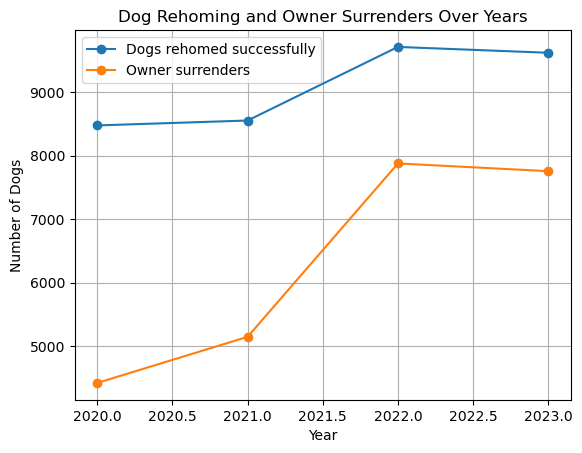

In [6]:
df.plot(x="Year", y=["Dogs rehomed successfully", "Owner surrenders"],
        kind="line", marker="o")
plt.title("Dog Rehoming and Owner Surrenders Over Years")
plt.ylabel("Number of Dogs")
plt.grid(True)
plt.show()

In [7]:
plt.figure()
df.plot(x="Year", y=["Dogs rehomed successfully", "Owner surrenders"],
        kind="line", marker="o")
plt.title("Dog Rehoming and Owner Surrenders Over Years")
plt.ylabel("Number of Dogs")
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/rehoming_vs_surrenders.png", dpi=300)
plt.close()

<Figure size 640x480 with 0 Axes>

In [10]:
parliament_df = pd.read_csv("Parliament report.csv")

In [11]:
parliament_df = parliament_df.dropna(axis=1, how="all")
parliament_df.columns = parliament_df.columns.str.strip()

is_million = parliament_df["Figures"].astype(str).str.contains("million", case=False, na=False)
num = parliament_df["Figures"].astype(str).str.extract(r"([\d\.]+)")
parliament_df["Figures_cleaned"] = pd.to_numeric(num[0], errors="coerce")
parliament_df.loc[is_million, "Figures_cleaned"] *= 1_000_000

parliament_df.head()

,Year,Type,Detail,Figures,Figures_cleaned
0,2021,Stray Dogs,Stray dogs collected,16707,16707.0
1,2022,Stray Dogs,Stray dogs collected,18345,18345.0
2,2023,Stray Dogs Reclaimed,Stray dogs reclaimed by owner,58%,58.0
3,2023,Shelter Capacity,Shelters at full or over capacity,78% of councils,78.0
4,2023,Public Spending,Council spending on stray dog,£15.2 million,15200000.0


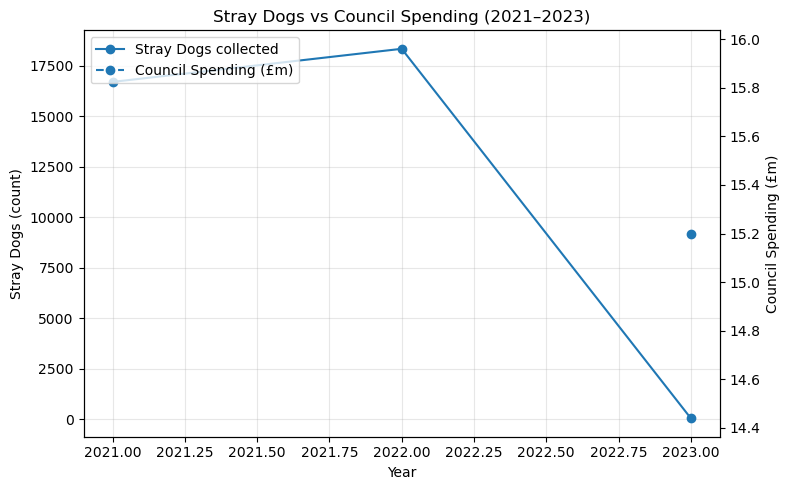

In [12]:
dogs_df  = parliament_df[parliament_df["Type"].str.contains("Stray Dogs", case=False)]
spend_df = parliament_df[parliament_df["Type"].str.contains("Public Spending", case=False)]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

ax1.plot(dogs_df["Year"], dogs_df["Figures_cleaned"], marker="o", label="Stray Dogs collected")
ax1.set_ylabel("Stray Dogs (count)")

ax2.plot(spend_df["Year"], spend_df["Figures_cleaned"]/1_000_000,
         marker="o", linestyle="--", label="Council Spending (£m)")
ax2.set_ylabel("Council Spending (£m)")

ax1.set_title("Stray Dogs vs Council Spending (2021–2023)")
ax1.set_xlabel("Year")
ax1.grid(True, alpha=0.3)

lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [l.get_label() for l in lines], loc="upper left")

plt.tight_layout()
plt.savefig("figures/stray_vs_spending.png", dpi=300)
plt.show()


In [18]:
battersea_df = pd.read_csv("Battersea .csv")
battersea_df.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Reason,Findings
0,Pet Ownership Surge,"40,392 rehome applications (Apr–Jun 2020) — 53..."
1,Behavioural Risks,"Impulse buying → poorly bred pets, less social..."
2,Domestic Abuse ↑,8.5% rise in partner abuse. Pets at greater ri...
3,Dog Theft,"Slight rise in theft (6% increase vs 2019), bu..."
4,Microchipping,77% drop in LA microchipping. Non-emergency ve...


### Battersea Data


| Factor                | Value    | Unit         |
|-----------------------|---------:|-------------|
| Pet Ownership Surge   | 49,432   | applications |
| Domestic Abuse Rise   | 7        | % increase   |
| Microchip Neglect     | 73       | % drop       |




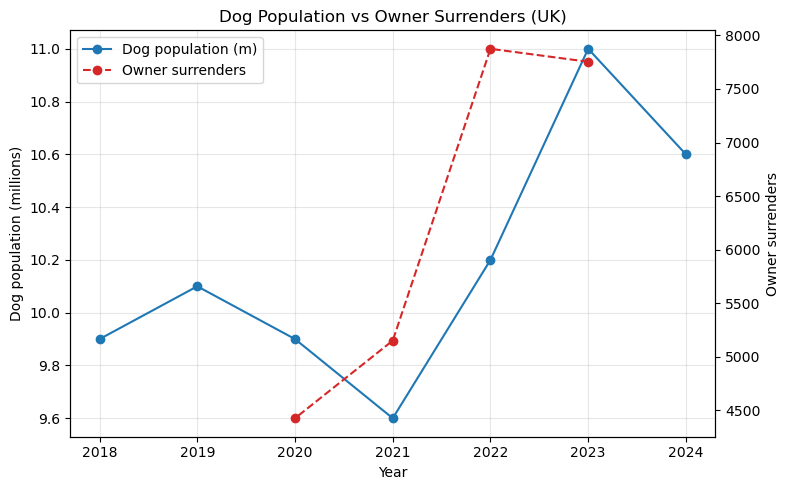

In [14]:
pop = pd.read_csv("DOG POPULATION PDSA.csv")
pop.columns = pop.columns.str.strip()

merged = pd.merge(pop[["Year","Dog population in millions"]],
                  df[["Year","Owner surrenders"]],
                  on="Year", how="left")

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

ax1.plot(merged["Year"], merged["Dog population in millions"], marker="o", label="Dog population (m)")
ax1.set_ylabel("Dog population (millions)")

ax2.plot(merged["Year"], merged["Owner surrenders"], marker="o", linestyle="--", color="tab:red", label="Owner surrenders")
ax2.set_ylabel("Owner surrenders")

ax1.set_title("Dog Population vs Owner Surrenders (UK)")
ax1.set_xlabel("Year")
ax1.grid(True, alpha=0.3)

lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [l.get_label() for l in lines], loc="upper left")

plt.tight_layout()
plt.savefig("figures/population_vs_surrenders.png", dpi=300)
plt.show()
